# Classification and Similarity Metrics.
# Cross Validation.
# Titanic Dataset.
-----------------------------
Radoslav Petkov

### About me
--------------
* Contact: https://www.linkedin.com/in/radoslav-petkov-8a4a53144/

# Agenda
* Recap
    * Supervised vs Unsupervised
    * Classification vs Regression
* Similarity Metrics
    * Euclidian distance
    * Manhattan distance
    * Cosine similarity
* Classification Metrics
    * Accuracy
    * Confusion Matrix
        * Precision
        * Recall
        * F1
* Cross Validation
* Titanic

# Recap

### Supervised vs Unsupervised
### Classification vs Regression

# Similarity Metrics

Def: Real valued function that measures the similarity between 2 objects (vectors).

## Euclidian distance

Def : Ordinary straight line distance: $ \sqrt{\sum_{i=1}^n (x_i-y_i)^2} $

![](euclidean.png)



## Manhattan distance

Def: Simple sum of the horizontal and vertical components $ \sum_{i=1}^n |x_i-y_i| $

![](manhattan.png)

## Cosine similarity
Def: Measure of similarity between 2 non-zero vectors of a nordmed space that measures the cosine of the angle between them. $ cos(\pmb x, \pmb y) = \frac {\pmb x \cdot \pmb y}{||\pmb x|| \cdot ||\pmb y||} $

![](cosine.png)

# Summarized
![](cover_post_final.png)

# Cross Validation

### We overfit. We do not have enought data. What we do?

# K-Fold Cross Validation


Split the dataset in K subsets and use K-1 for training and K for testing. The error rate is avaraged over all K trials.
![](K-fold_cross_validation_EN.jpg)

# Classification metrics

How to measure the performance of a model?

## Accuracy
The number of correct predictions from all predictions made.
![](accuracy.jpg)

Problem statement: 

Imagine having labels (False and True) distributed like this: 
***90% False and 10% True***

The model that constantly output ***False*** will have ***90%*** accuracy. Not bad. 

# The solution: Confusion matrix

Table that allows visualization of the performance of a supervised algorithm

![](sphx_glr_plot_confusion_matrix_002.png)

# Binary Confusion Matrix
![](confusion_matrix_1.png)

## Precision
Precision is: $\frac{TP}{TP + FP}$

True Positives divided by the sum of True Positives and False Positives

![](confusion_matrix_1.png)

## Recall

Recall is: $\frac{TP}{TP + FN}$

True Positives divided by the sum of True Positives and False Negatives.
![](confusion_matrix_1.png)

# F1 score

F1 score is the harmonic mean of Recall and Precision: $\frac{2*Recall*Precision}{Recall + Precission} $

# Titanic: Machine Learning from Disaster

![](hqdefault.jpg)

| Variable |	Definition |	Key|
--- | --- | ---
|survival|	Survival|	0 = No, 1 = Yes
|pclass|	Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd
|sex	|Sex	
|Age	|Age in years	
|sibsp|	# of siblings / spouses aboard the Titanic	
|parch|	# of parents / children aboard the Titanic	
|ticket	|Ticket number	
|fare|	Passenger fare	
|cabin|	Cabin number	
|embarked|	Port of Embarkation|	C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('https://raw.githubusercontent.com/radpet/fmi-ml/master/titanic/train.csv', index_col='PassengerId')

train,test = train_test_split(data, stratify=data['Survived'], random_state=123)
print('Train', train.shape)
print('Test', test.shape)
train.head()

Train (668, 11)
Test (223, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9000,NaN,S
422,0,3,"Charters, Mr. David",male,21.0,0,0,A/5. 13032,7.7333,NaN,Q
337,0,1,"Pears, Mr. Thomas Clinton",male,29.0,1,0,113776,66.6000,C2,S
682,1,1,"Hassab, Mr. Hammad",male,27.0,0,0,PC 17572,76.7292,D49,C
611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S


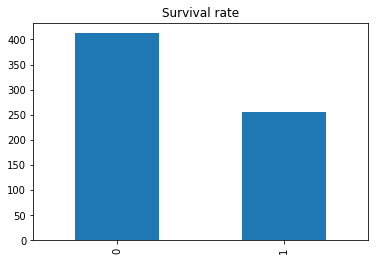

In [2]:
import matplotlib.pyplot as plt
train['Survived'].value_counts().plot(kind='bar', title='Survival rate')
plt.show()

# Now lets explore how some of the variables affect the survival

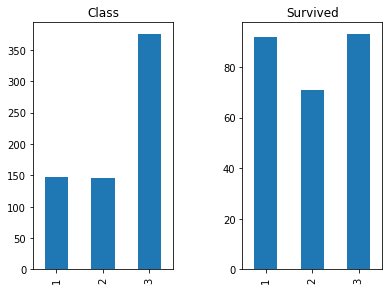

In [3]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(wspace=0.5)
fig.add_subplot(2, 3, 1)
train['Pclass'].value_counts(sort=False).plot(kind="bar", title="Class")
fig.add_subplot(2, 3, 2)
train[ train['Survived'] == 1]['Pclass'].value_counts(sort=False).sort_index().plot(kind='bar', title='Survived')
plt.show()

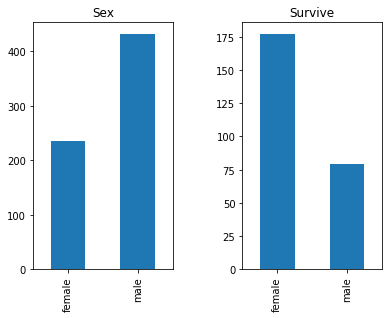

In [4]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(wspace=0.5)
fig.add_subplot(2, 3,1)
train['Sex'].value_counts(sort=False).sort_index().plot(kind="bar", title="Sex")
fig.add_subplot(2, 3,2)
train[ train['Survived'] == 1]['Sex'].value_counts(sort=False).sort_index().plot(kind='bar', title='Survive')
plt.show()

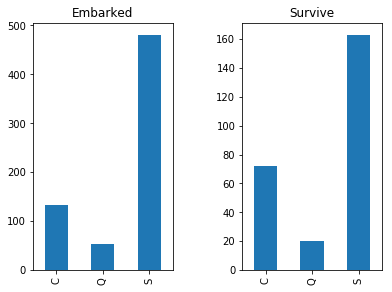

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(wspace=0.5)
fig.add_subplot(2, 3, 1)
train['Embarked'].value_counts(sort=False).sort_index().plot(kind="bar", title="Embarked")
fig.add_subplot(2, 3, 2)
train[ train['Survived'] == 1]['Embarked'].value_counts(sort=False).sort_index().plot(kind='bar', title='Survive')
plt.show()

In [6]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         131
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       532
Embarked      1
dtype: int64

### We have missing data! What can we do now?

* Remove whole sample
* Fill with mean
* Fill with data augmentation
* Create model that predicts the missing values

# Lets explore the data more and find if we can find a way to fill Age,Cabin,Embarked

Lets look what the names might tell us. A quick search in wikipedia (https://en.wikipedia.org/wiki/English_honorifics) gives:

* Master: for boys or young men and as a title for the heir apparent of a Scottish baron or viscount.
* Mr: for men, regardless of marital status, who do not have another professional or academic title
* Miss: for girls, unmarried women and (in the UK) married women who continue to use their maiden name (although "Ms" is often preferred for the last two). 
* Ms: for women, regardless of marital status or when marital status is unknown.

In [7]:
train[ train['Age']<12].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S
60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S
165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S
536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S


In [8]:
train[ train['Age']>12].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9000,NaN,S
422,0,3,"Charters, Mr. David",male,21.0,0,0,A/5. 13032,7.7333,NaN,Q
337,0,1,"Pears, Mr. Thomas Clinton",male,29.0,1,0,113776,66.6000,C2,S
682,1,1,"Hassab, Mr. Hammad",male,27.0,0,0,PC 17572,76.7292,D49,C
611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S


In [9]:
import numpy as np
title_list = ['Mr.', 'Master.', 'Mrs.', 'Miss']
def fill_age(dataset):
    dt = dataset.copy()
    def map_names(name):
        for title in title_list:
            if title in name:
                return title
        return 'Unknown'

    dt['Name'] = dt['Name'].map(map_names)

    def slice_and_get_mean_age_by_name(name):
        return dt.loc[dt['Name'] == name, 'Age'].mean()

    age_means = {title:slice_and_get_mean_age_by_name(title) for title in title_list}
    print(age_means)
    def fill_age(person):
        if person['Name'] == 'Unknown':
            person['Age'] = dt['Age'].mean()
        else:
            if pd.isnull(person['Age']):
                person['Age'] = age_means[person['Name']]
        return person
       
    
    dt = dt.apply(fill_age, axis=1)
    
    print(dt['Age'].isnull().sum())
    return dt
train_filled = fill_age(train)


{'Mrs.': 35.53012048192771, 'Miss': 22.323809523809523, 'Mr.': 31.506644518272424, 'Master.': 4.2279999999999998}
0


In [10]:
train_filled[:10]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
684,0,3,Mr.,male,14.0,5,2,CA 2144,46.9000,NaN,S
422,0,3,Mr.,male,21.0,0,0,A/5. 13032,7.7333,NaN,Q
337,0,1,Mr.,male,29.0,1,0,113776,66.6000,C2,S
682,1,1,Mr.,male,27.0,0,0,PC 17572,76.7292,D49,C
611,0,3,Mrs.,female,39.0,1,5,347082,31.2750,NaN,S
68,0,3,Mr.,male,19.0,0,0,S.P. 3464,8.1583,NaN,S
817,0,3,Miss,female,23.0,0,0,STON/O2. 3101290,7.9250,NaN,S
149,0,2,Mr.,male,36.5,0,2,230080,26.0000,F2,S
718,1,2,Miss,female,27.0,0,0,34218,10.5000,E101,S


In [11]:
train[:10]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9000,NaN,S
422,0,3,"Charters, Mr. David",male,21.0,0,0,A/5. 13032,7.7333,NaN,Q
337,0,1,"Pears, Mr. Thomas Clinton",male,29.0,1,0,113776,66.6000,C2,S
682,1,1,"Hassab, Mr. Hammad",male,27.0,0,0,PC 17572,76.7292,D49,C
611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S
68,0,3,"Crease, Mr. Ernest James",male,19.0,0,0,S.P. 3464,8.1583,NaN,S
817,0,3,"Heininen, Miss. Wendla Maria",female,23.0,0,0,STON/O2. 3101290,7.9250,NaN,S
149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S
718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.5000,E101,S


In [12]:
def get_labels(dataset):
    return dataset['Survived']

In [13]:
def get_features(dataset):
    features = pd.DataFrame()
    features['male'] = (dataset['Sex'] == 'male').astype('float')
    features['female'] = (dataset['Sex'] == 'female').astype('float')
    for pclass in range(4):
        features['pclass_' + str(pclass)] = (dataset['Pclass'] == pclass).astype('float')
        
    for embarked in ['S','C','Q']:
        features['embarked_' + embarked] = (dataset['Embarked'] == embarked).astype('float')
    
    features['age'] = dataset['Age']
    features['sibsp'] = dataset['SibSp']
    features['Parch'] = dataset['Parch']
    
    return features

In [14]:
x_train = get_features(train_filled)
y_train = get_labels(train)
x_train.head()

,male,female,pclass_0,pclass_1,pclass_2,pclass_3,embarked_S,embarked_C,embarked_Q,age,sibsp,Parch
PassengerId,,,,,,,,,,,,
684,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,14.0,5,2
422,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,21.0,0,0
337,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,29.0,1,0
682,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,27.0,0,0
611,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,39.0,1,5


In [15]:
y_train.head()

PassengerId
684    0
422    0
337    0
682    1
611    0
Name: Survived, dtype: int64

In [16]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression(C=10,class_weight='balanced', random_state=123)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_logistic,x_train, y_train, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())

[ 0.80740741  0.8358209   0.7593985   0.77443609  0.81954887]
0.799322352315


In [17]:
from sklearn.svm import LinearSVC

model_svm = LinearSVC(C=0.001,class_weight='balanced', random_state=123)

scores = cross_val_score(model_svm,x_train, get_labels(train), cv=5, scoring='accuracy')
print(scores)
print(scores.mean())

[ 0.8         0.82089552  0.79699248  0.7593985   0.79699248]
0.794855796207


In [18]:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=123)
scores = cross_val_score(model_forest,x_train, get_labels(train), cv=5, scoring='accuracy')
print(scores)
print(scores.mean())

[ 0.82962963  0.78358209  0.76691729  0.77443609  0.77443609]
0.785800238573


I won't show how we can do the hyperparameter tuning for each model but you can read more at:

https://en.wikipedia.org/wiki/Hyperparameter_optimization , http://scikit-learn.org/stable/modules/grid_search.html 

# Lets see how good model we have built?

In [19]:
x_test = get_features(fill_age(test)) # we may set age by title to constant once we obtain it from train set
y_test = get_labels(test)

{'Mrs.': 37.119999999999997, 'Miss': 20.365853658536587, 'Mr.': 35.041237113402062, 'Master.': 6.3049999999999997}
0


In [20]:
model_logistic = LogisticRegression(C=10,class_weight='balanced', random_state=123)
model_logistic.fit(x_train, y_train)

score = model_logistic.score(x_test,y_test)
print(score)

0.762331838565


In [21]:
model_svm = LinearSVC(C=0.001,class_weight='balanced', random_state=123)
model_svm.fit(x_train, y_train)

score = model_svm.score(x_test,y_test)
print(score)

0.77130044843


In [22]:
model_forest = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=123)
model_forest.fit(x_train, y_train)

score = model_forest.score(x_test,y_test)
print(score)

0.784753363229


![](qa.jpg)

![](the_end_thank.jpg)

# References
* http://fmi.machine-learning.bg/lectures/07-model-validation
* http://scikit-learn.org/stable/modules/model_evaluation.html
* https://turi.com/learn/userguide/evaluation/classification.html
* http://dataaspirant.com/2015/04/11/five-most-popular-similarity-measures-implementation-in-python/
* https://en.wikipedia.org/wiki/Cross-validation_(statistics)
* https://www.kaggle.com/c/titanic
* https://medium.com/@klintcho/explaining-precision-and-recall-c770eb9c69e9